<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#adding-the-continents:" data-toc-modified-id="adding-the-continents:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>adding the continents:</a></span></li><li><span><a href="#Explore-the-number-of-death-and-magnitude-per-continent:" data-toc-modified-id="Explore-the-number-of-death-and-magnitude-per-continent:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Explore the number of death and magnitude per continent:</a></span></li></ul></div>

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import geopandas
%matplotlib inline

In [3]:
world_earthquake = pd.read_csv('../data/world_earthquakes_06_clean.csv')
world_earthquake.head()

,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths
0,1900-05-11 17:23:00,1900,5,11,17:23:00,Japan,38.7,141.1,5.0,7.0,NaN,0
1,1900-07-12 06:25:00,1900,7,12,06:25:00,Turkey,40.3,43.1,NaN,5.9,NaN,140
2,1900-10-29 09:11:00,1900,10,29,09:11:00,Venezuela,11.0,-66.0,0.0,7.7,NaN,0
3,1901-02-15 00:00:00,1901,2,15,00:00:00,China,26.0,100.1,0.0,6.5,NaN,0
4,1901-03-31 07:11:00,1901,3,31,07:11:00,Bulgaria,43.4,28.7,NaN,6.4,NaN,4


## 1/ Adding the continents:

In [5]:
continents = pd.read_csv('../data/continents.csv')
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


In [6]:
# rename columns to be able to merge them to world_earthquake
continents = continents.rename(columns = {"Continent" : "continent", "Country" : "country"})

In [7]:
world_earthquake = pd.merge(left = world_earthquake, right = continents)

In [8]:
world_earthquake.head()

,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths,continent
0,1900-05-11 17:23:00,1900,5,11,17:23:00,Japan,38.7,141.1,5.0,7.0,NaN,0,Asia
1,1901-08-09 09:23:00,1901,8,9,09:23:00,Japan,40.5,142.5,35.0,7.2,tsunami,0,Asia
2,1902-01-30 14:01:00,1902,1,30,14:01:00,Japan,40.5,141.3,35.0,6.9,NaN,1,Asia
3,1905-06-02 05:39:00,1905,6,2,05:39:00,Japan,34.1,132.5,55.0,7.0,NaN,11,Asia
4,1909-08-14 06:31:00,1909,8,14,06:31:00,Japan,35.4,136.3,5.0,6.7,NaN,41,Asia


## 2/ Explore the number of death per continent:

Explore number of death and magnitude per continent:

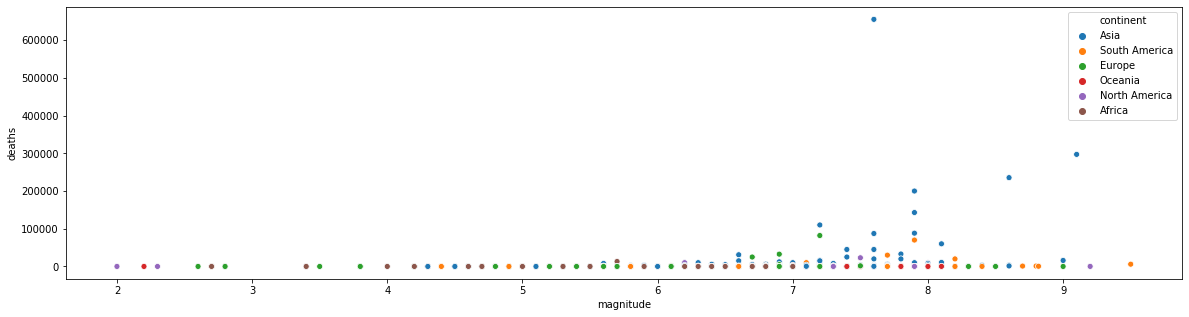

In [62]:
plt.figure(figsize = (20,5))
sns.scatterplot(data=world_earthquake, x="magnitude", y="deaths", hue="continent");

The top most deadly earthquakes are in Asia. The worse one in all time was in China with a magnitude of 7.6.

In [41]:
world_earthquake[(world_earthquake.deaths > 600000)]

,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths,continent
266,1976-07-27 19:42:00,1976,7,27,19:42:00,China,39.605,117.888,16.7,7.6,NaN,655237,Asia


Explore all the countries with more than 10,000 death in the world:

In [37]:
world_earthquake[(world_earthquake.deaths > 10000)]

,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths,continent
14,1923-09-01 02:58:00,1923,9,1,02:58:00,Japan,35.405,139.084,35.0,7.9,"tsunami, fire",143000,Asia
80,2011-03-11 14:46:00,2011,3,11,14:46:00,Japan,38.322,142.369,24.4,9.0,tsunami,15894,Asia
98,1939-12-26 23:57:00,1939,12,26,23:57:00,Turkey,39.770,39.533,35.0,7.8,NaN,32968,Asia
152,1999-08-17 00:01:00,1999,8,17,00:01:00,Turkey,40.773,30.003,13.3,7.6,NaN,45000,Asia
202,1920-12-16 12:05:00,1920,12,16,12:05:00,China,36.601,105.317,25.0,8.6,NaN,235502,Asia
207,1927-05-22 22:32:00,1927,5,22,22:32:00,China,37.386,102.311,25.0,7.9,NaN,200000,Asia
252,1970-01-04 17:00:00,1970,1,4,17:00:00,China,24.147,102.462,14.0,7.2,NaN,15621,Asia
266,1976-07-27 19:42:00,1976,7,27,19:42:00,China,39.605,117.888,16.7,7.6,NaN,655237,Asia
346,2008-05-12 06:28:00,2008,5,12,06:28:00,China,31.002,103.322,19.0,7.9,landslide,88287,Asia
376,1976-02-04 09:01:00,1976,2,4,09:01:00,Guatemala,15.296,-89.145,12.3,7.5,tsunami,23000,North America


The top 31 from the deadliest: China 5 times,  Italy 3 times (cause: landslide, tsunami), Japan 2 times (cause: Tsunami), Indonesia 2 times (cause: tsunami), Pakistan 2 times (cause: landslide, liquification), Turkey 2 times, Iran 2 times (cause: landslide), India 2 times. 
It looks like the location is different for countries with deadliest quakes so the prediction where it will happen and when sounds difficult to predict.

In [90]:
world_earthquake.nlargest(31, 'deaths')

,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths,continent,log_deaths
266,1976-07-27 19:42:00,1976,7,27,19:42:00,China,39.605,117.888,16.7,7.6,NaN,655237,Asia,13.392752
774,2004-12-26 00:58:00,2004,12,26,00:58:00,Indonesia,3.287,95.972,30.0,9.1,"tsunami, landslide",297200,Asia,12.602161
202,1920-12-16 12:05:00,1920,12,16,12:05:00,China,36.601,105.317,25.0,8.6,NaN,235502,Asia,12.369475
207,1927-05-22 22:32:00,1927,5,22,22:32:00,China,37.386,102.311,25.0,7.9,NaN,200000,Asia,12.206073
14,1923-09-01 02:58:00,1923,9,1,02:58:00,Japan,35.405,139.084,35.0,7.9,"tsunami, fire",143000,Asia,11.870600
1104,1948-10-05 20:12:00,1948,10,5,20:12:00,Turkmenistan,37.500,58.000,0.0,7.2,NaN,110000,Asia,11.608236
346,2008-05-12 06:28:00,2008,5,12,06:28:00,China,31.002,103.322,19.0,7.9,landslide,88287,Asia,11.388348
919,2005-10-08 03:50:00,2005,10,8,03:50:00,Pakistan,34.465,73.584,23.1,7.6,"landslide, liquification",87351,Asia,11.377690
564,1908-12-28 04:20:00,1908,12,28,04:20:00,Italy,38.000,15.500,0.0,7.2,tsunami,82000,Europe,11.314475
971,1970-05-31 20:23:00,1970,5,31,20:23:00,Peru,-9.248,-78.840,73.0,7.9,landslide,70000,South America,11.156251


## 3/Correlation between deaths and factors:

I apply a log to # of deaths to see if I get a better correlation:

In [63]:
world_earthquake['log_deaths'] = world_earthquake['deaths'].apply(np.log)

In [237]:
world_earthquake[['year','depth', 'magnitude', 'deaths', 'log_deaths']].corr()

,year,depth,magnitude,deaths,log_deaths
year,1.000000,0.013030,-0.346927,-0.038838,-0.347260
depth,0.013030,1.000000,0.170129,-0.020222,-0.112834
magnitude,-0.346927,0.170129,1.000000,0.137988,0.434967
deaths,-0.038838,-0.020222,0.137988,1.000000,0.316760
log_deaths,-0.347260,-0.112834,0.434967,0.316760,1.000000


The best correlation is magnitude and then maybe year? Surprisingly depth is definitely not a factor:

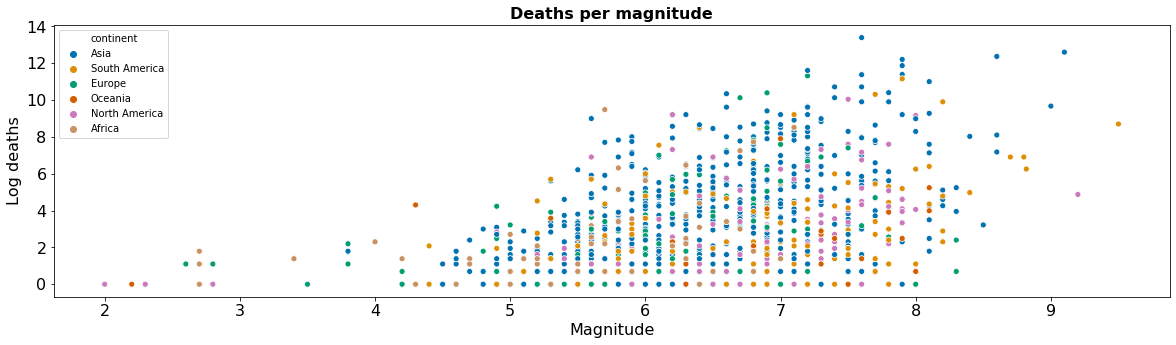

In [80]:
fontsize = 16

plt.figure(figsize = (20,5))
sns.scatterplot(data=world_earthquake, x="magnitude", y="log_deaths", hue="continent", palette ="colorblind")
plt.xticks(fontsize = fontsize)
plt.xlabel('Magnitude', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('Log deaths', fontsize = fontsize)
plt.title('Deaths per magnitude', fontsize = fontsize, fontweight = 'bold');

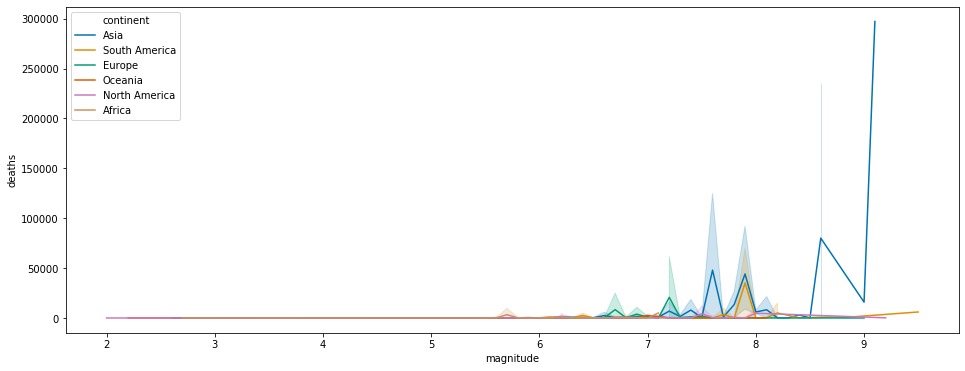

In [81]:
plt.figure(figsize=(16,6))
sns.lineplot(data= world_earthquake,x ="magnitude",y="deaths", hue="continent", palette ="colorblind");

I don't see anything for year:

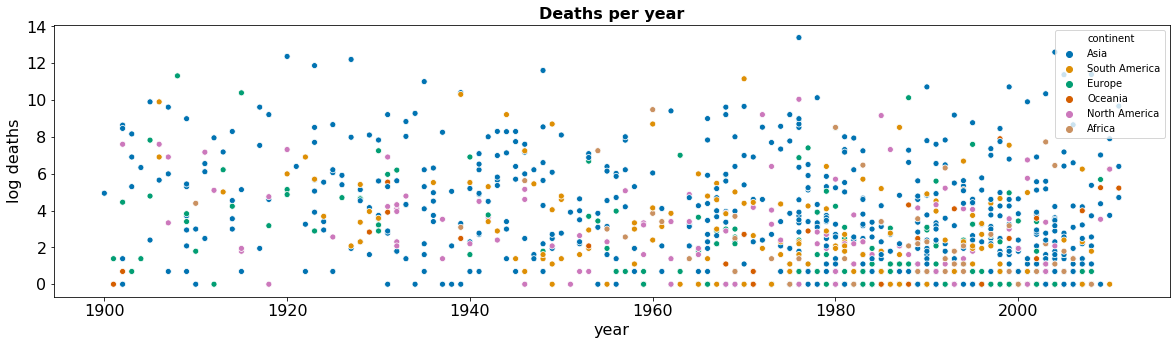

In [242]:
fontsize = 16

plt.figure(figsize = (20,5))
sns.scatterplot(data=world_earthquake, x="year", y="log_deaths", hue="continent", palette ="colorblind")
plt.xticks(fontsize = fontsize)
plt.xlabel('year', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('log deaths', fontsize = fontsize)
plt.title('Deaths per year', fontsize = fontsize, fontweight = 'bold');

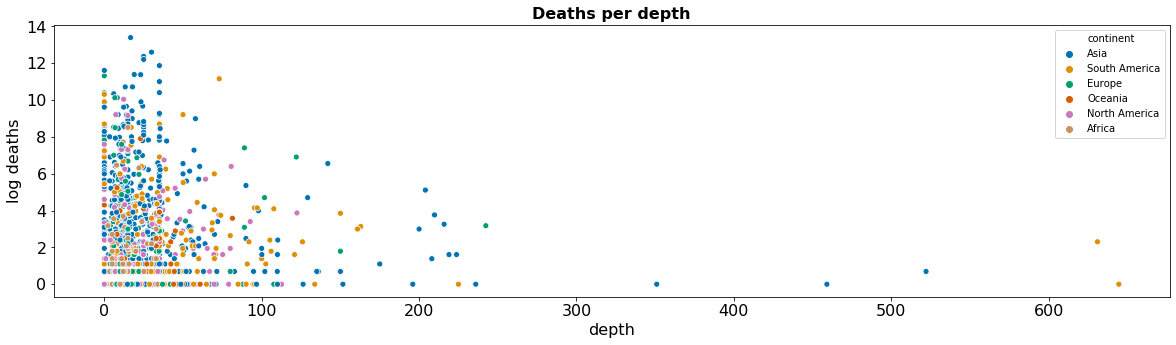

In [243]:
fontsize = 16

plt.figure(figsize = (20,5))
sns.scatterplot(data=world_earthquake, x="depth", y="log_deaths", hue="continent", palette ="colorblind")
plt.xticks(fontsize = fontsize)
plt.xlabel('depth', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('log deaths', fontsize = fontsize)
plt.title('Deaths per depth', fontsize = fontsize, fontweight = 'bold');

I find only a correlation between the number of death and the magnitude intensity.

## 3/ Explore few countries:

### 1/ China:

In [47]:
earthquake_china = world_earthquake[world_earthquake.country == "China"]

In [92]:
earthquake_china.head()

,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths,continent,log_deaths
189,1901-02-15 00:00:00,1901,2,15,00:00:00,China,26.0,100.1,0.0,6.5,NaN,0,Asia,-inf
190,1902-07-03 15:36:00,1902,7,3,15:36:00,China,43.2,129.6,20.0,6.7,NaN,0,Asia,-inf
191,1902-08-22 03:00:00,1902,8,22,03:00:00,China,40.0,77.0,0.0,7.7,NaN,5650,Asia,8.639411
192,1904-08-30 11:42:00,1904,8,30,11:42:00,China,30.0,101.0,0.0,6.8,NaN,565,Asia,6.336826
193,1906-12-22 18:21:00,1906,12,22,18:21:00,China,43.5,85.0,0.0,7.2,NaN,285,Asia,5.652489


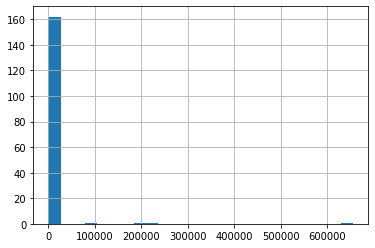

In [91]:
earthquake_china['deaths'].hist(bins = 25);

Histogram is skewed to the right which mean that most earthquakes are not deadly!

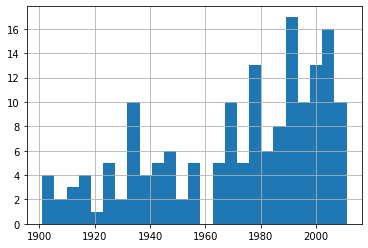

In [98]:
earthquake_china['year'].hist(bins = 25);

There is an increase of earthquake over the years, or there is a better detection of earthquakes

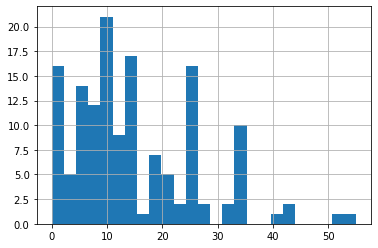

In [99]:
earthquake_china['depth'].hist(bins = 25);

Depth over 50 is pretty rare.

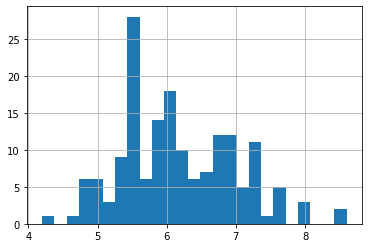

In [100]:
earthquake_china['magnitude'].hist(bins = 25);

Magnitude is a fairly normal distribution between 4 and 8.

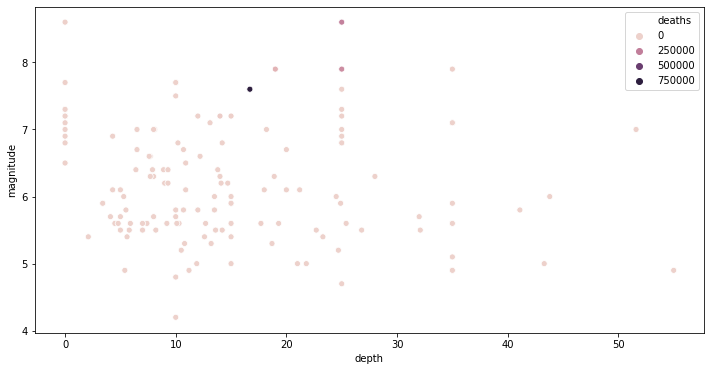

In [48]:
plt.figure(figsize = (12,6))
sns.scatterplot(data=earthquake_china, x="depth", y="magnitude", hue="deaths");

In China, the deadliest events had a magnitude over 7.5 but they were not very deep...

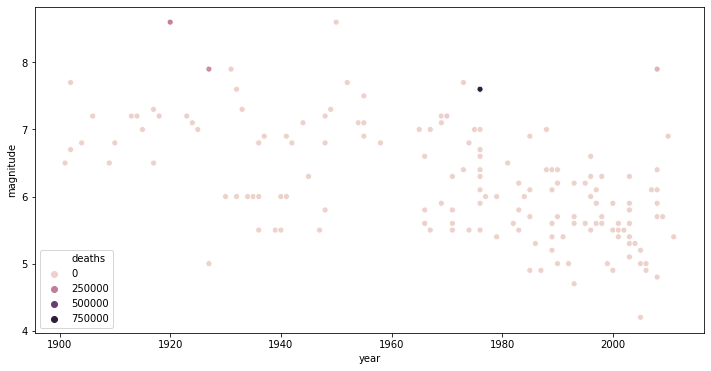

In [88]:
plt.figure(figsize = (12,6))
sns.scatterplot(data=earthquake_china, x="year", y="magnitude", hue="deaths");

Interestingly in 1976, there is 9 earthquakes reported with one at 7.6 magnitude and the deadliest. Other years there is not as many earthquakes usually. There were 2 deadly earthquakes in 1920 at 8.6 and 1927 at 7.9, however there is no other earthquakes these years... 
Should I look more into that?

In [95]:
# Adding population in China
pop_china = pd.read_csv('../data/china.csv')
pop_china.head()

,city,lat,lng,country,iso2,admin,capital,population,population_proper
0,Shanghai,31.222222,121.458056,China,CN,Shanghai,admin,14987000.0,14608512.0
1,Beijing,39.928819,116.388869,China,CN,Beijing,primary,11106000.0,7480601.0
2,Guangzhou,23.116667,113.250000,China,CN,Guangdong,admin,8829000.0,3152825.0
3,Shenzhen,22.533333,114.133333,China,CN,Guangdong,minor,7581000.0,1002592.0
4,Wuhan,30.583333,114.266667,China,CN,Hubei,admin,7243000.0,4184206.0


In [96]:
# cleaning
pop_china = (pop_china
          .drop(columns = ['iso2','admin','capital', 'population_proper' ])
          .rename(columns = {'lat': 'latitude', 'lng': 'longitude'})
         )

pop_china.shape

(2187, 5)

In [97]:
pop_china.head()

,city,latitude,longitude,country,population
0,Shanghai,31.222222,121.458056,China,14987000.0
1,Beijing,39.928819,116.388869,China,11106000.0
2,Guangzhou,23.116667,113.250000,China,8829000.0
3,Shenzhen,22.533333,114.133333,China,7581000.0
4,Wuhan,30.583333,114.266667,China,7243000.0


Making a plot with population and # of death and using lat and long:

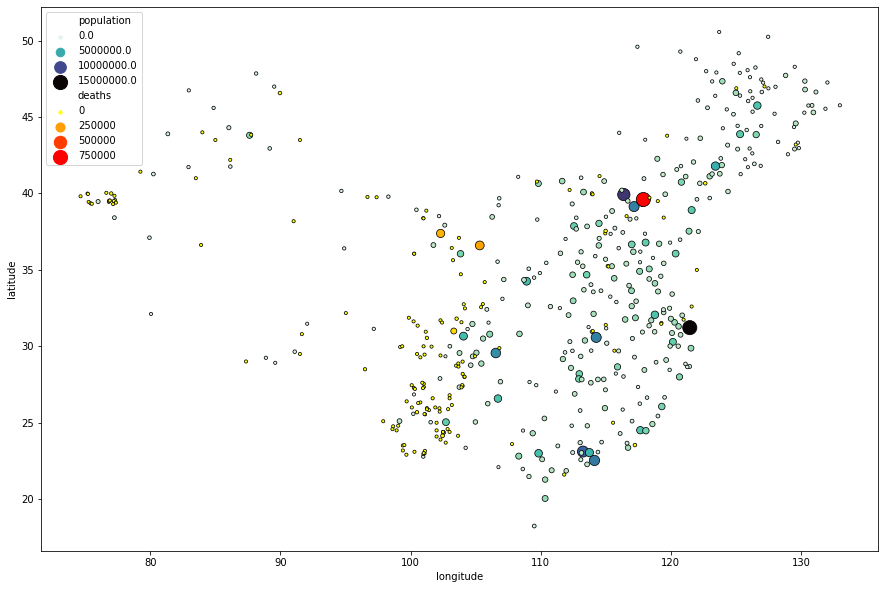

In [222]:
plt.figure(figsize = (15,10))

sns.scatterplot(data=pop_china, x="longitude", y="latitude", hue="population", palette="mako_r", size="population", sizes=(10, 200), edgecolor = 'black')

sns.scatterplot(data=earthquake_china, x="longitude", y="latitude", hue="deaths",palette="autumn_r", size="deaths", sizes=(10, 200), edgecolor = 'black');

Trying to get geospatial (at least getting the shape) but it's not working and it's probably due to the fact that I'm not in "geo" environment (will look into that later if time allowed):

In [201]:
# get an error: AttributeError: module 'geopandas' has no attribute 'points_from_xy'
#gdf = geopandas.GeoDataFrame(
#      earthquake_china, geometry=geopandas.points_from_xy(earthquake_china.longitude, earthquake_china.latitude))
#china_gdf = geopandas.GeoDataFrame(
            #pop_china, geometry=geopandas.points_from_xy(pop_china.longitude, pop_china.latitude))

I was trying to get the same plot but with magnitude but plt plot messed it up...

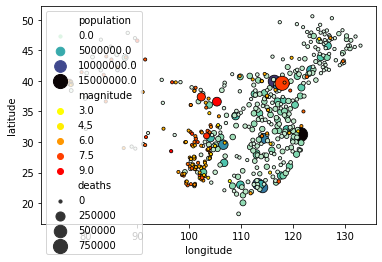

In [188]:

sns.scatterplot(data=pop_china, x="longitude", y="latitude", hue="population", palette="mako_r", size="population", sizes=(10, 200), edgecolor = 'black')

sns.scatterplot(data=earthquake_china, x="longitude", y="latitude", hue="magnitude",palette="autumn_r", size="deaths", sizes=(10, 200), edgecolor = 'black');

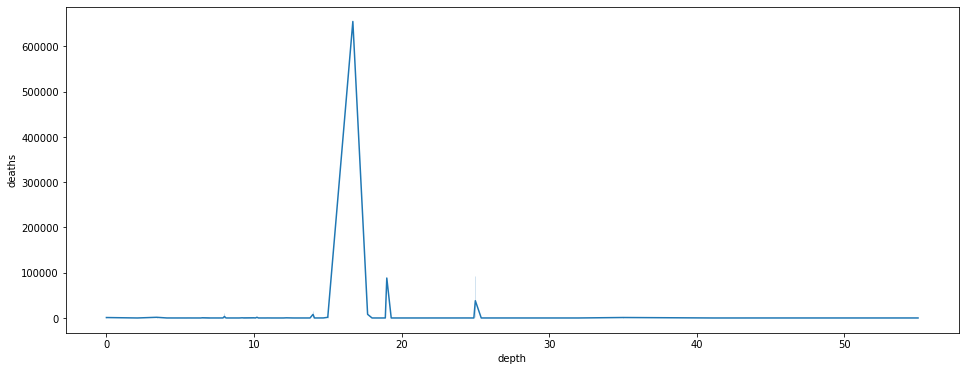

In [54]:
plt.figure(figsize=(16,6))
sns.lineplot(data= earthquake_china,x ="depth",y="deaths");

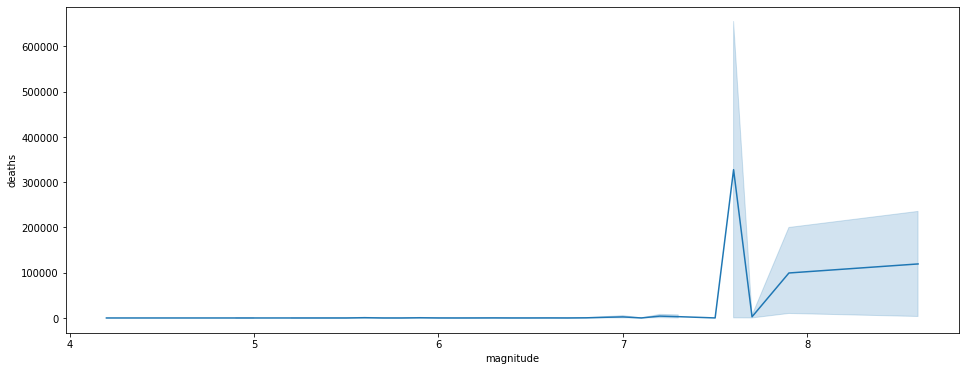

In [104]:
plt.figure(figsize=(16,6))
sns.lineplot(data= earthquake_china,x ="magnitude",y="deaths");

In [56]:
earthquake_china[["magnitude",  "deaths"]].corr()

,magnitude,deaths
magnitude,1.000000,0.275477
deaths,0.275477,1.000000


In [250]:
#china_quake_pop_merge = earthquake_china.merge(pop_china, on= ('country','latitude', 'longitude'), how = 'outer')
#china_quake_pop_merge.head()

,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths,continent,log_deaths,city,population
0,1901-02-15 00:00:00,1901.0,2.0,15.0,00:00:00,China,26.0,100.1,0.0,6.5,NaN,0.0,Asia,-inf,NaN,NaN
1,1902-07-03 15:36:00,1902.0,7.0,3.0,15:36:00,China,43.2,129.6,20.0,6.7,NaN,0.0,Asia,-inf,NaN,NaN
2,1902-08-22 03:00:00,1902.0,8.0,22.0,03:00:00,China,40.0,77.0,0.0,7.7,NaN,5650.0,Asia,8.639411,NaN,NaN
3,1904-08-30 11:42:00,1904.0,8.0,30.0,11:42:00,China,30.0,101.0,0.0,6.8,NaN,565.0,Asia,6.336826,NaN,NaN
4,1906-12-22 18:21:00,1906.0,12.0,22.0,18:21:00,China,43.5,85.0,0.0,7.2,NaN,285.0,Asia,5.652489,NaN,NaN


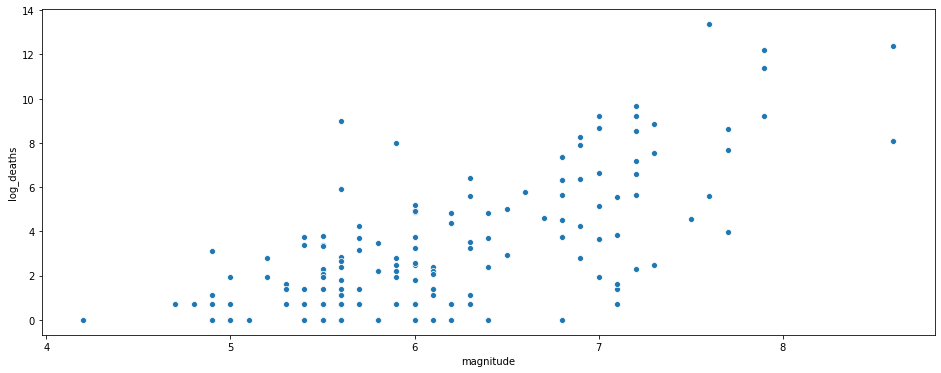

In [261]:
plt.figure(figsize=(16,6))
sns.scatterplot(data = china_quake_pop_merge, x="magnitude", y='log_deaths');

In [60]:
earthquake_china[["magnitude",  "log_deaths"]].corr()

,magnitude,log_deaths
magnitude,1.000000,0.713104
log_deaths,0.713104,1.000000


I find a good correlation between magnitude of the earthquake and the number of death in China after applying a log.

### 2/ Pakistan

In [185]:
earthquake_pakistan = world_earthquake[world_earthquake.country == "Pakistan"]
earthquake_pakistan.head()

,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths,continent,log_deaths
898,1909-10-20 23:41:00,1909,10,20,23:41:00,Pakistan,30.000,68.000,0.0,7.0,NaN,231,Asia,5.442418
899,1931-08-27 15:27:00,1931,8,27,15:27:00,Pakistan,29.473,67.172,35.0,7.1,NaN,200,Asia,5.298317
900,1935-05-30 21:32:00,1935,5,30,21:32:00,Pakistan,28.894,66.176,35.0,8.1,NaN,60000,Asia,11.002100
901,1945-11-27 21:56:00,1945,11,27,21:56:00,Pakistan,24.500,63.000,0.0,8.0,tsunami,4000,Asia,8.294050
902,1966-08-01 21:02:00,1966,8,1,21:02:00,Pakistan,30.051,68.629,9.8,7.0,NaN,2,Asia,0.693147


In [186]:
pop_pakistan = pd.read_csv('../data/pakistan.csv')
pop_pakistan.head()

,city,lat,lng,country,iso2,admin,capital,population,population_proper
0,Karachi,24.905600,67.082200,Pakistan,PK,Sindh,admin,12130000.0,11624219.0
1,Lahore,31.549722,74.343611,Pakistan,PK,Punjab,admin,6577000.0,6310888.0
2,Faisalābād,31.416667,73.083333,Pakistan,PK,Punjab,minor,2617000.0,2506595.0
3,Serai,34.739330,72.335655,Pakistan,PK,Khyber Pakhtunkhwa,NaN,1860310.0,1860310.0
4,Rāwalpindi,33.597331,73.047904,Pakistan,PK,Punjab,minor,1858000.0,1743101.0


In [187]:
pop_pakistan = (pop_pakistan
          .drop(columns = ['iso2','admin','capital', 'population_proper' ])
          .rename(columns = {'lat': 'latitude', 'lng': 'longitude'})
         )

pop_pakistan.head()

,city,latitude,longitude,country,population
0,Karachi,24.905600,67.082200,Pakistan,12130000.0
1,Lahore,31.549722,74.343611,Pakistan,6577000.0
2,Faisalābād,31.416667,73.083333,Pakistan,2617000.0
3,Serai,34.739330,72.335655,Pakistan,1860310.0
4,Rāwalpindi,33.597331,73.047904,Pakistan,1858000.0


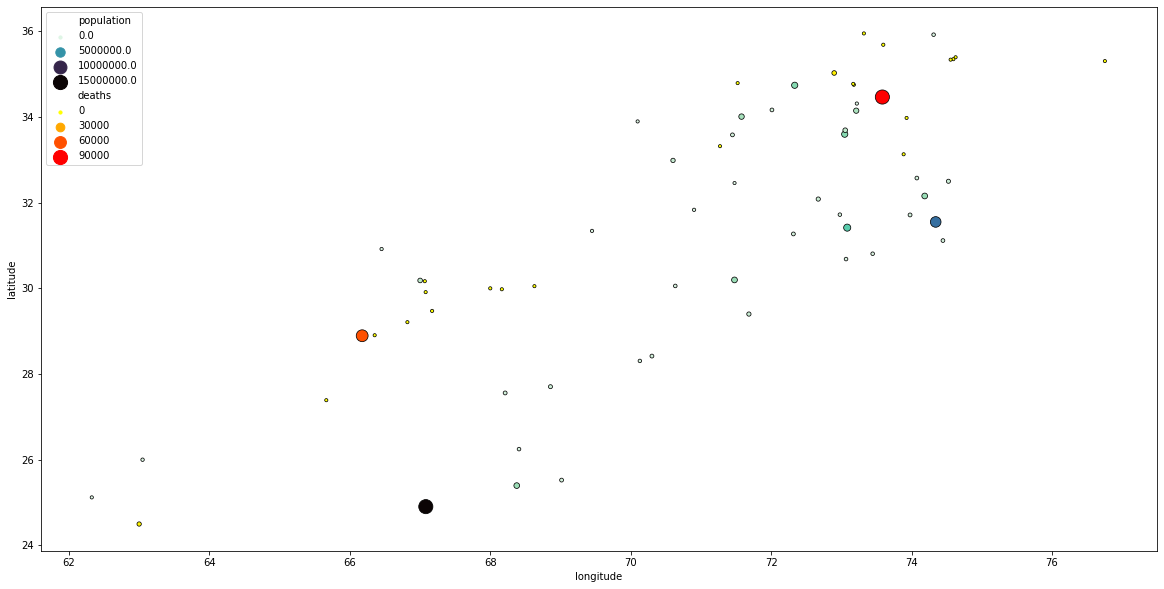

In [202]:
plt.figure(figsize = (20,10))

sns.scatterplot(data=pop_pakistan, x="longitude", y="latitude", hue="population", palette="mako_r", size="population", sizes=(10, 200), edgecolor = 'black')

sns.scatterplot(data=earthquake_pakistan, x="longitude", y="latitude", hue="deaths",palette="autumn_r", size="deaths", sizes=(10, 200), edgecolor = 'black');

### 3/ Italy

In [203]:
earthquake_italy = world_earthquake[world_earthquake.country == "Italy"]
earthquake_italy.head()

,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths,continent,log_deaths
563,1905-09-08 01:43:00,1905,9,8,01:43:00,Italy,39.0,16.0,0.0,6.8,tsunami,2500,Europe,7.824046
564,1908-12-28 04:20:00,1908,12,28,04:20:00,Italy,38.0,15.5,0.0,7.2,tsunami,82000,Europe,11.314475
565,1914-05-08 18:01:00,1914,5,8,18:01:00,Italy,37.7,15.2,NaN,4.9,NaN,69,Europe,4.234107
566,1915-01-13 06:52:00,1915,1,13,06:52:00,Italy,42.0,13.5,0.0,6.9,NaN,32610,Europe,10.392374
567,1920-09-07 05:55:00,1920,9,7,05:55:00,Italy,44.3,10.3,10.0,5.8,NaN,171,Europe,5.141664


In [204]:
pop_italy = pd.read_csv('../data/italy.csv')
pop_italy.head()

,city,lat,lng,country,iso2,admin,capital,population,population_proper
0,Rome,41.900000,12.483333,Italy,IT,Lazio,primary,3339000.0,35452.0
1,Milan,45.466667,9.200000,Italy,IT,Lombardy,admin,2945000.0,1306661.0
2,Naples,40.833333,14.250000,Italy,IT,Campania,admin,2250000.0,988972.0
3,Turin,45.050000,7.666667,Italy,IT,Piedmont,admin,1652000.0,865263.0
4,Florence,43.766667,11.250000,Italy,IT,Tuscany,admin,1500000.0,371517.0


In [205]:
pop_italy = (pop_italy
          .drop(columns = ['iso2','admin','capital', 'population_proper' ])
          .rename(columns = {'lat': 'latitude', 'lng': 'longitude'})
         )

pop_italy.head()

,city,latitude,longitude,country,population
0,Rome,41.900000,12.483333,Italy,3339000.0
1,Milan,45.466667,9.200000,Italy,2945000.0
2,Naples,40.833333,14.250000,Italy,2250000.0
3,Turin,45.050000,7.666667,Italy,1652000.0
4,Florence,43.766667,11.250000,Italy,1500000.0


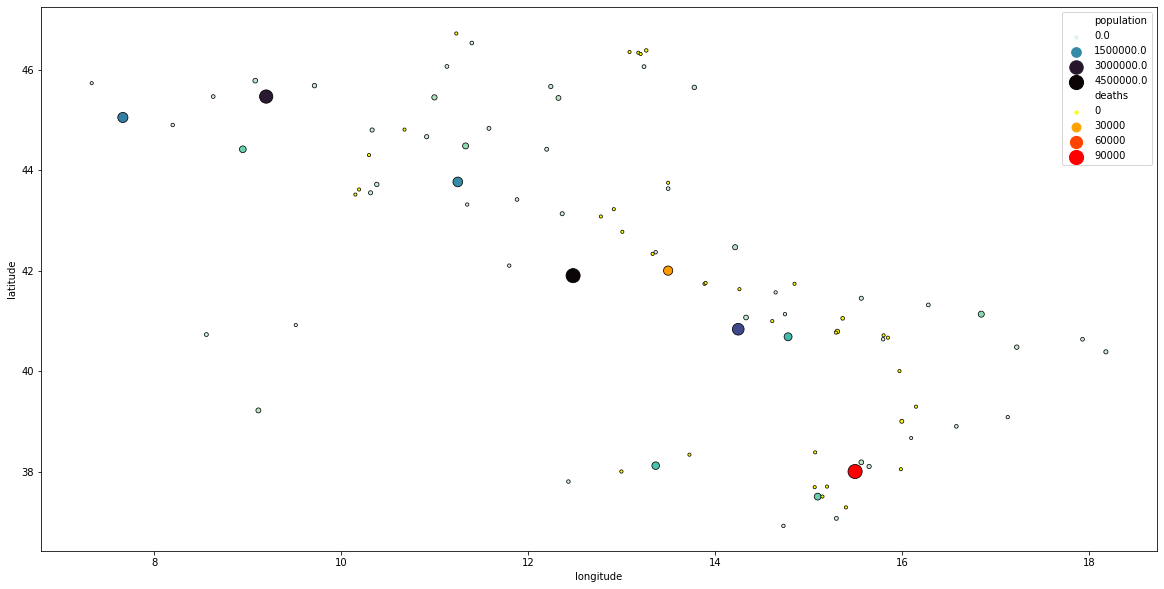

In [206]:
plt.figure(figsize = (20,10))

sns.scatterplot(data=pop_italy, x="longitude", y="latitude", hue="population", palette="mako_r", size="population", sizes=(10, 200), edgecolor = 'black')

sns.scatterplot(data=earthquake_italy, x="longitude", y="latitude", hue="deaths",palette="autumn_r", size="deaths", sizes=(10, 200), edgecolor = 'black');

### 4/ Iran

In [214]:
earthquake_iran = world_earthquake[world_earthquake.country == "Iran"]

In [215]:
pop_iran = pd.read_csv('../data/iran.csv')

In [216]:
pop_iran = (pop_iran
          .drop(columns = ['iso2','admin','capital', 'population_proper' ])
          .rename(columns = {'lat': 'latitude', 'lng': 'longitude'})
         )


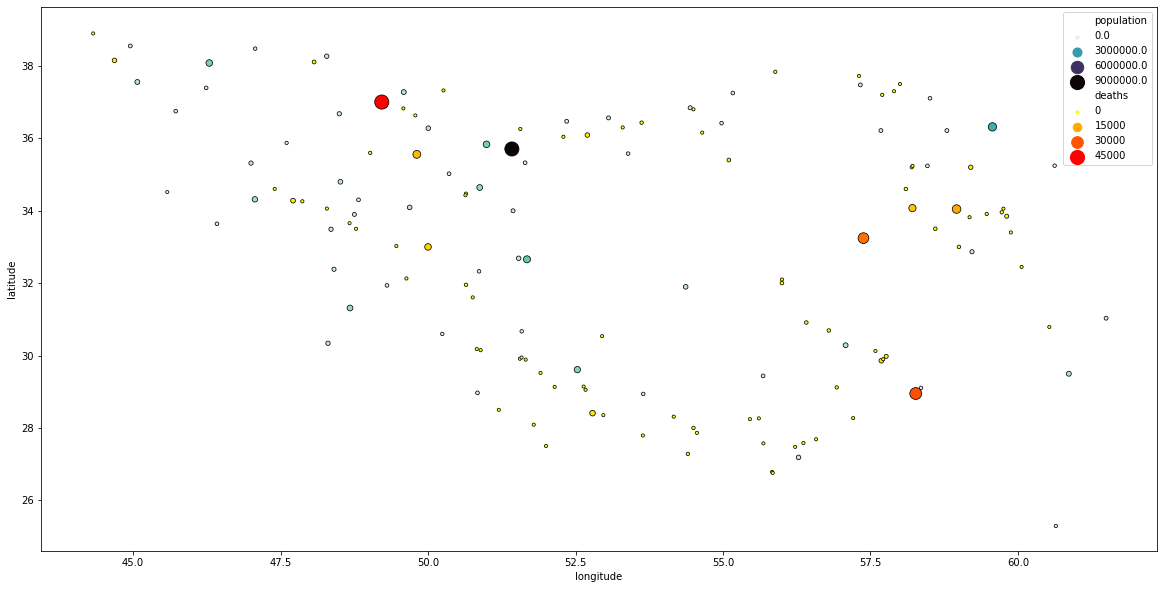

In [217]:
plt.figure(figsize = (20,10))

sns.scatterplot(data=pop_iran, x="longitude", y="latitude", hue="population", palette="mako_r", size="population", sizes=(10, 200), edgecolor = 'black')

sns.scatterplot(data=earthquake_iran, x="longitude", y="latitude", hue="deaths",palette="autumn_r", size="deaths", sizes=(10, 200), edgecolor = 'black');

### 5/ India

In [218]:
earthquake_india = world_earthquake[world_earthquake.country == "India"]

In [219]:
pop_india = pd.read_csv('../data/india.csv')

In [220]:
pop_india = (pop_india
          .drop(columns = ['iso2','admin','capital', 'population_proper' ])
          .rename(columns = {'lat': 'latitude', 'lng': 'longitude'})
         )


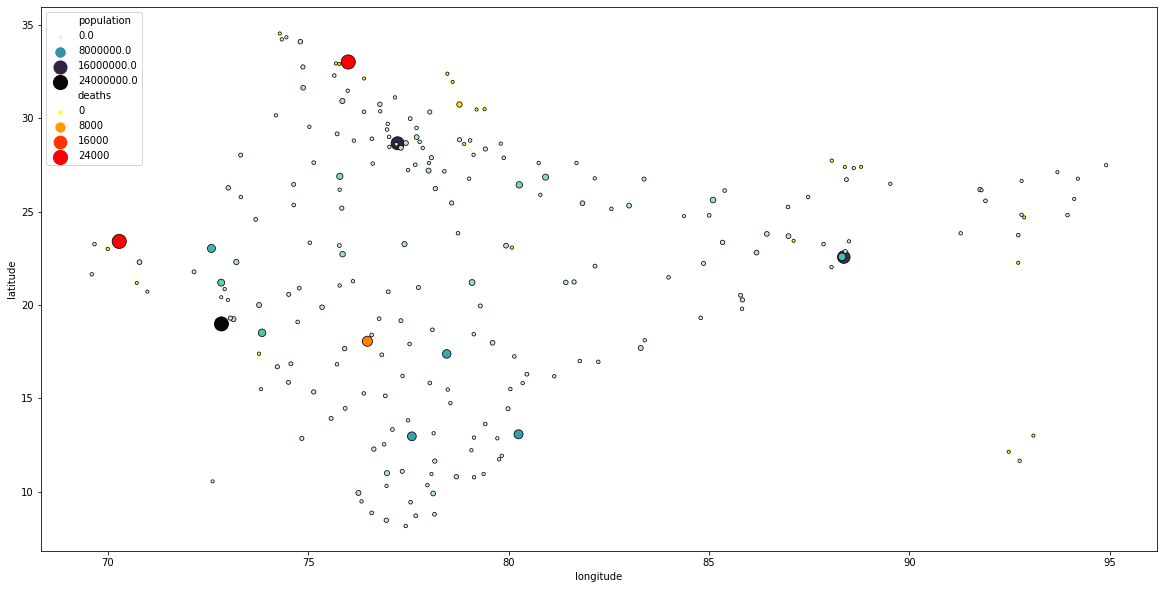

In [221]:
plt.figure(figsize = (20,10))

sns.scatterplot(data=pop_india, x="longitude", y="latitude", hue="population", palette="mako_r", size="population", sizes=(10, 200), edgecolor = 'black')

sns.scatterplot(data=earthquake_india, x="longitude", y="latitude", hue="deaths",palette="autumn_r", size="deaths", sizes=(10, 200), edgecolor = 'black');

### 6/ Explore Japan: Death principal cause is tsunami

In [228]:
earthquake_japan = world_earthquake[world_earthquake.country == "Japan"]

In [229]:
pop_japan = pd.read_csv('../data/japan.csv')

In [230]:
pop_japan = (pop_japan
          .drop(columns = ['iso2','admin','capital', 'population_proper' ])
          .rename(columns = {'lat': 'latitude', 'lng': 'longitude'})
         )

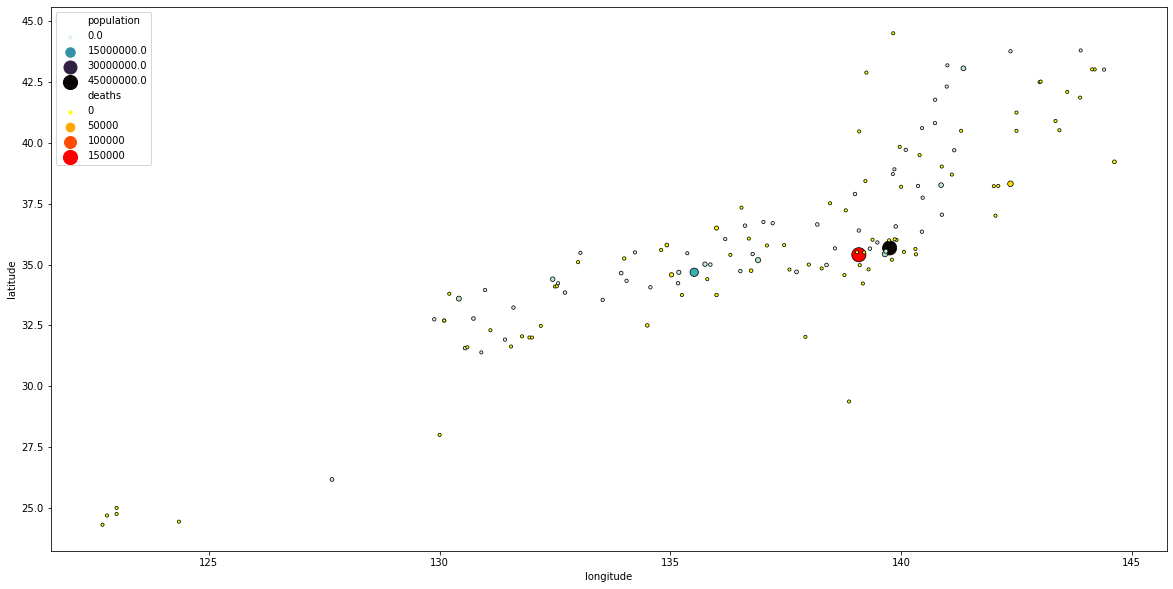

In [231]:
plt.figure(figsize = (20,10))

sns.scatterplot(data=pop_japan, x="longitude", y="latitude", hue="population", palette="mako_r", size="population", sizes=(10, 200), edgecolor = 'black')

sns.scatterplot(data=earthquake_japan, x="longitude", y="latitude", hue="deaths",palette="autumn_r", size="deaths", sizes=(10, 200), edgecolor = 'black');